Trying to perform linear regression on movie data

In [1]:
import sys
sys.path.append("..")

from reader import generic_reader
import pandas as pd
import ast  # Abstract Syntax Trees - safely parse string list to Python list
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
danish_actors = generic_reader.read_csv_file_to_data_frame("movie_data/danish_actors_with_birthdays.csv")
print(danish_actors.info())
danish_actors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16032 entries, 0 to 16031
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   actor_id    16032 non-null  int64 
 1   actor_name  16032 non-null  object
 2   gender      16032 non-null  int64 
 3   movie_ids   16032 non-null  object
 4   birthday    4300 non-null   object
dtypes: int64(2), object(3)
memory usage: 626.4+ KB
None


,actor_id,actor_name,gender,movie_ids,birthday
0,2956800,Christopher,2,"[859585, 1119173, 1426672, 1408690, 748798]",1992-01-31
1,2595149,Cecilie Haugaard Larsen,1,"[1426672, 655713]",1994-11-29
2,1141086,Vic Carmen Sonne,1,"[514692, 1030919, 705420, 406808, 77471, 51946...",1994-04-23
3,4460,Trine Dyrholm,1,"[33283, 897155, 200584, 16009, 98444, 752908, ...",1972-04-15
4,1458362,Besir Zeciri,2,"[1304451, 1317159, 1030919, 629034, 662765, 52...",1990-07-06
...,...,...,...,...,...
16027,1376496,Kai Heimann,0,[298604],NaN
16028,3944603,Carl Plum,0,[239875],NaN
16029,3944604,Niels Plum,0,[239875],NaN
16030,1274995,Alexander Lind,0,[239875],NaN


In [3]:
danish_actors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16032 entries, 0 to 16031
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   actor_id    16032 non-null  int64 
 1   actor_name  16032 non-null  object
 2   gender      16032 non-null  int64 
 3   movie_ids   16032 non-null  object
 4   birthday    4300 non-null   object
dtypes: int64(2), object(3)
memory usage: 626.4+ KB


In [4]:
# Step 1: Convert 'birthday' to datetime format (if it's not already)
danish_actors['birthday'] = pd.to_datetime(danish_actors['birthday'])
danish_actors['deathday'] = pd.to_datetime('2000-01-01')

In [5]:
def calculate_age(birthday, deathday=None):
    if deathday is None:
        end_date = pd.to_datetime('2024-12-31')
    else:
        end_date = deathday
        
    age = end_date.year - birthday.year - ((end_date.month, end_date.day) < (birthday.month, birthday.day))
    return age

In [6]:
# danish_actors['age'] = danish_actors['birthday'].apply(calculate_age)

In [7]:
danish_actors

,actor_id,actor_name,gender,movie_ids,birthday,deathday
0,2956800,Christopher,2,"[859585, 1119173, 1426672, 1408690, 748798]",1992-01-31,2000-01-01
1,2595149,Cecilie Haugaard Larsen,1,"[1426672, 655713]",1994-11-29,2000-01-01
2,1141086,Vic Carmen Sonne,1,"[514692, 1030919, 705420, 406808, 77471, 51946...",1994-04-23,2000-01-01
3,4460,Trine Dyrholm,1,"[33283, 897155, 200584, 16009, 98444, 752908, ...",1972-04-15,2000-01-01
4,1458362,Besir Zeciri,2,"[1304451, 1317159, 1030919, 629034, 662765, 52...",1990-07-06,2000-01-01
...,...,...,...,...,...,...
16027,1376496,Kai Heimann,0,[298604],NaT,2000-01-01
16028,3944603,Carl Plum,0,[239875],NaT,2000-01-01
16029,3944604,Niels Plum,0,[239875],NaT,2000-01-01
16030,1274995,Alexander Lind,0,[239875],NaT,2000-01-01


In [8]:
# Step 1: Convert the string representation of list to actual list
danish_actors['movie_ids_list'] = danish_actors['movie_ids'].apply(ast.literal_eval)


# Step 2: Count the number of movie IDs
danish_actors['movie_count'] = danish_actors['movie_ids_list'].apply(len)

In [9]:
danish_actors

,actor_id,actor_name,gender,movie_ids,birthday,deathday,movie_ids_list,movie_count
0,2956800,Christopher,2,"[859585, 1119173, 1426672, 1408690, 748798]",1992-01-31,2000-01-01,"[859585, 1119173, 1426672, 1408690, 748798]",5
1,2595149,Cecilie Haugaard Larsen,1,"[1426672, 655713]",1994-11-29,2000-01-01,"[1426672, 655713]",2
2,1141086,Vic Carmen Sonne,1,"[514692, 1030919, 705420, 406808, 77471, 51946...",1994-04-23,2000-01-01,"[514692, 1030919, 705420, 406808, 77471, 51946...",19
3,4460,Trine Dyrholm,1,"[33283, 897155, 200584, 16009, 98444, 752908, ...",1972-04-15,2000-01-01,"[33283, 897155, 200584, 16009, 98444, 752908, ...",47
4,1458362,Besir Zeciri,2,"[1304451, 1317159, 1030919, 629034, 662765, 52...",1990-07-06,2000-01-01,"[1304451, 1317159, 1030919, 629034, 662765, 52...",13
...,...,...,...,...,...,...,...,...
16027,1376496,Kai Heimann,0,[298604],NaT,2000-01-01,[298604],1
16028,3944603,Carl Plum,0,[239875],NaT,2000-01-01,[239875],1
16029,3944604,Niels Plum,0,[239875],NaT,2000-01-01,[239875],1
16030,1274995,Alexander Lind,0,[239875],NaT,2000-01-01,[239875],1


In [10]:
danish_actors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16032 entries, 0 to 16031
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   actor_id        16032 non-null  int64         
 1   actor_name      16032 non-null  object        
 2   gender          16032 non-null  int64         
 3   movie_ids       16032 non-null  object        
 4   birthday        4300 non-null   datetime64[ns]
 5   deathday        16032 non-null  datetime64[ns]
 6   movie_ids_list  16032 non-null  object        
 7   movie_count     16032 non-null  int64         
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 1002.1+ KB


In [11]:
# sns.scatterplot(data=danish_actors, x='age', y='movie_count', alpha=0.2)

In [12]:
def calculate_age_from_row(row):
    birthday = row['birthday']
    # deathday = row.get('deathday', None)
    deathday = row['deathday']
    
    if pd.isna(birthday):
        return None
    
    # birthday = pd.to_datetime(birthday)
    
    if deathday is None or pd.isna(deathday):
        end_date = pd.to_datetime('2024-12-31')
    else:
        end_date = pd.to_datetime(deathday)
    
    age = end_date.year - birthday.year - ((end_date.month, end_date.day) < (birthday.month, birthday.day))
    return age

In [13]:
danish_actors['age'] = danish_actors.apply(calculate_age_from_row, axis=1)

In [14]:
danish_actors

,actor_id,actor_name,gender,movie_ids,birthday,deathday,movie_ids_list,movie_count,age
0,2956800,Christopher,2,"[859585, 1119173, 1426672, 1408690, 748798]",1992-01-31,2000-01-01,"[859585, 1119173, 1426672, 1408690, 748798]",5,7.0
1,2595149,Cecilie Haugaard Larsen,1,"[1426672, 655713]",1994-11-29,2000-01-01,"[1426672, 655713]",2,5.0
2,1141086,Vic Carmen Sonne,1,"[514692, 1030919, 705420, 406808, 77471, 51946...",1994-04-23,2000-01-01,"[514692, 1030919, 705420, 406808, 77471, 51946...",19,5.0
3,4460,Trine Dyrholm,1,"[33283, 897155, 200584, 16009, 98444, 752908, ...",1972-04-15,2000-01-01,"[33283, 897155, 200584, 16009, 98444, 752908, ...",47,27.0
4,1458362,Besir Zeciri,2,"[1304451, 1317159, 1030919, 629034, 662765, 52...",1990-07-06,2000-01-01,"[1304451, 1317159, 1030919, 629034, 662765, 52...",13,9.0
...,...,...,...,...,...,...,...,...,...
16027,1376496,Kai Heimann,0,[298604],NaT,2000-01-01,[298604],1,NaN
16028,3944603,Carl Plum,0,[239875],NaT,2000-01-01,[239875],1,NaN
16029,3944604,Niels Plum,0,[239875],NaT,2000-01-01,[239875],1,NaN
16030,1274995,Alexander Lind,0,[239875],NaT,2000-01-01,[239875],1,NaN


<Axes: xlabel='age', ylabel='movie_count'>

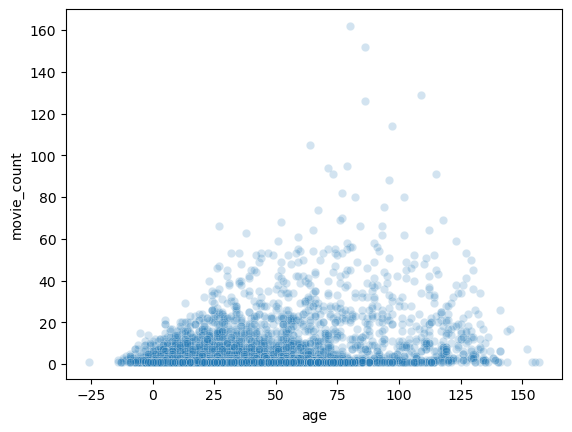

In [15]:
sns.scatterplot(data=danish_actors, x='age', y='movie_count', alpha=0.2)